In [76]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import keras
import keras_preprocessing
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.losses import mean_squared_error


In [77]:
air = pd.read_csv('AirQualityUCI.csv')

In [78]:
air.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139
9356,4/4/2005,14:00:00,2.2,1071,-200,11.9,1047,265,654,168,1129,816,28.5,13.1,0.5028


In [79]:
train_dataset = air.sample(frac=0.8, random_state=0)

In [80]:
train_dataset

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
1121,4/26/2004,11:00:00,1.3,917,101,5.2,772,98,1098,78,1311,605,18.8,31.7,0.6821
8028,2/8/2005,6:00:00,0.6,918,-200,1.6,551,114,1062,92,817,712,6.1,43.6,0.4129
3803,8/16/2004,5:00:00,0.4,766,-200,2.4,616,43,1163,43,1306,530,21.5,45.6,1.1558
4595,9/18/2004,5:00:00,0.5,775,-200,2.3,609,58,1319,42,1190,468,20.2,46.7,1.0899
587,4/4/2004,5:00:00,-200.0,1010,-200,3.0,650,-200,1171,-200,1434,664,13.7,66.5,1.0393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5122,10/10/2004,4:00:00,-200.0,941,-200,3.6,686,50,942,38,1406,549,22.8,64.0,1.7507
4114,8/29/2004,4:00:00,-200.0,904,-200,4.8,753,-200,809,-200,1529,766,21.0,66.9,1.6454
3813,8/16/2004,15:00:00,0.8,825,-200,3.8,702,53,1077,57,1267,458,38.4,16.4,1.0957
7964,2/5/2005,14:00:00,1.1,903,-200,3.7,696,180,932,129,850,629,9.3,33.1,0.3874


In [81]:
test_dataset = air.drop(train_dataset.index)

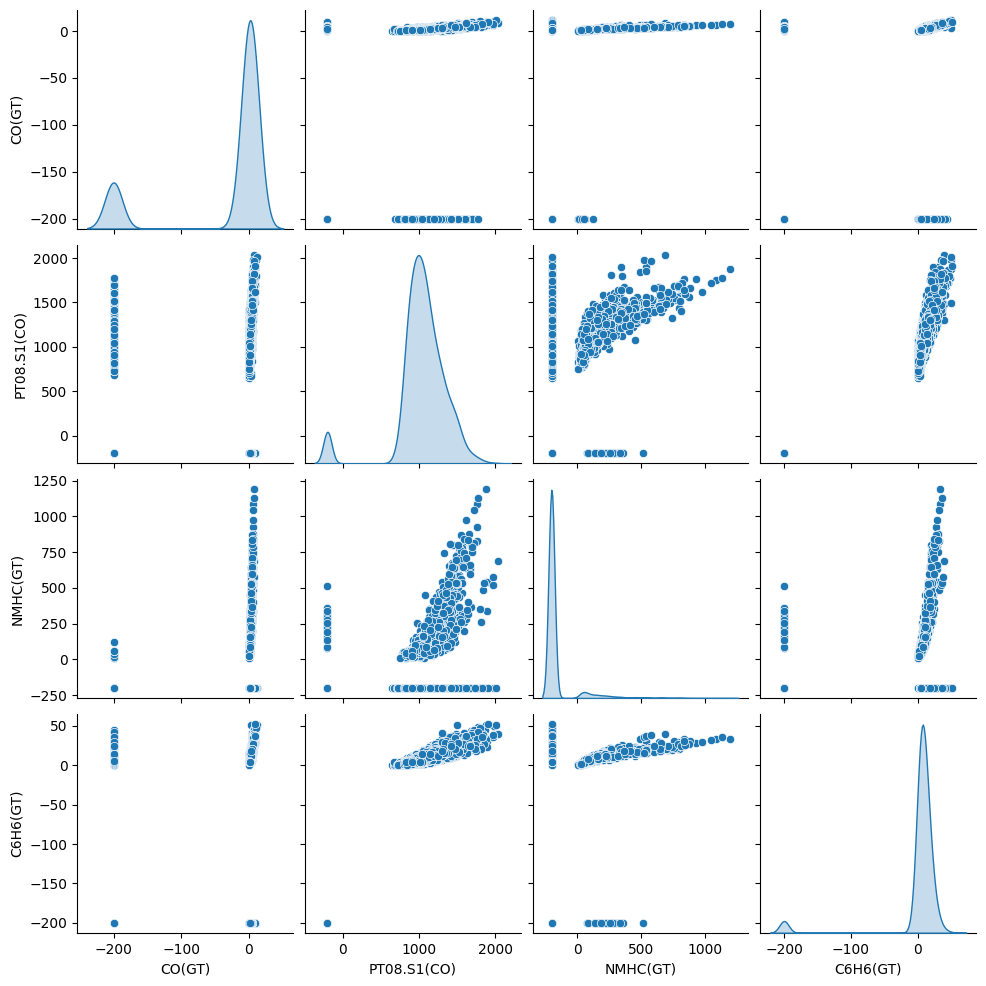

In [82]:
sns.pairplot(train_dataset[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)']], diag_kind='kde')


In [83]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CO(GT),7486.0,-34.287617,77.709461,-200.0,0.60000,1.5000,2.6000,11.900
PT08.S1(CO),7486.0,1046.254208,329.792940,-200.0,919.25000,1050.0000,1217.0000,2040.000
NMHC(GT),7486.0,-158.690756,140.800954,-200.0,-200.00000,-200.0000,-200.0000,1189.000
C6H6(GT),7486.0,1.717793,41.571183,-200.0,4.00000,7.8000,13.5750,52.100
PT08.S2(NMHC),7486.0,891.950040,342.325696,-200.0,708.25000,893.0000,1102.0000,2007.000
NOx(GT),7486.0,166.507881,256.091422,-200.0,49.00000,140.0000,282.0000,1479.000
PT08.S3(NOx),7486.0,797.553967,324.834524,-200.0,639.00000,797.0000,962.0000,2683.000
NO2(GT),7486.0,57.200641,127.148003,-200.0,53.00000,96.0000,132.0000,340.000
PT08.S4(NO2),7486.0,1388.307641,467.746917,-200.0,1180.00000,1445.0000,1661.0000,2775.000
PT08.S5(O3),7486.0,970.668982,456.662312,-200.0,697.00000,940.0000,1246.0000,2523.000


In [84]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('RH')
test_labels = test_features.pop('RH')
train_features
print(train_features.shape)
print(test_features.shape)

(7486, 14)
(1871, 14)


In [85]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
CO(GT),-34.287617,77.709461
PT08.S1(CO),1046.254208,329.792940
NMHC(GT),-158.690756,140.800954
C6H6(GT),1.717793,41.571183
PT08.S2(NMHC),891.950040,342.325696
NOx(GT),166.507881,256.091422
PT08.S3(NOx),797.553967,324.834524
NO2(GT),57.200641,127.148003
PT08.S4(NO2),1388.307641,467.746917
PT08.S5(O3),970.668982,456.662312


In [86]:
arr = air.to_numpy()
X = arr[:, 0:13]
Y = arr[:, 13]

#Test Train Split:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)

Y_train = Y_train.reshape((Y_train.shape[0], 1))
Y_test = Y_test.reshape((Y_test.shape[0], 1)) #convert row vector to column vector

In [87]:
X_train.shape
Y_test.shape
Y_test.shape
X_test.shape

(1872, 13)

In [88]:

model = tf.keras.Sequential([
    tf.keras.Input(shape=(11,)),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=1, activation='linear')
     ])

In [89]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.mean_squared_error)

In [90]:
air=air.drop('Time', axis=1)
air=air.drop('Date',axis=1)
air.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [91]:
col_=air.columns.tolist()[1:]
X=air[col_].drop('RH',axis=1)
y=air['RH'] 
ss_x = StandardScaler()
X=ss_x.fit_transform(X) 

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=False)

In [93]:
Xt=X_train
yt=y_train

# First
node = 64 > 16 > 1
layer = 3

In [98]:
model_first = tf.keras.Sequential([
    tf.keras.Input(shape=(11,)),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=1, activation='linear')
     ])

In [99]:
model_first.compile(optimizer='adam',
              loss='tf.keras.losses.mean_squared_error')

In [101]:

model_first.compile(optimizer='adam',
             loss=tf.keras.losses.mean_squared_error)

In [102]:
model_first.fit(X_train,y_train, epochs=150)

Epoch 1/150
234/234 [==============================] - 1s 1ms/step - loss: 2732.4854
Epoch 2/150
234/234 [==============================] - 0s 1ms/step - loss: 579.6667
Epoch 3/150
234/234 [==============================] - 0s 1ms/step - loss: 244.5641
Epoch 4/150
234/234 [==============================] - 0s 1ms/step - loss: 147.8862
Epoch 5/150
234/234 [==============================] - 0s 1ms/step - loss: 92.1436
Epoch 6/150
234/234 [==============================] - 0s 1ms/step - loss: 64.0859
Epoch 7/150
234/234 [==============================] - 0s 1ms/step - loss: 50.9172
Epoch 8/150
234/234 [==============================] - 0s 1ms/step - loss: 44.4031
Epoch 9/150
234/234 [==============================] - 0s 1ms/step - loss: 39.3985
Epoch 10/150
234/234 [==============================] - 0s 1ms/step - loss: 35.7369
Epoch 11/150
234/234 [==============================] - 0s 1ms/step - loss: 32.3893
Epoch 12/150
234/234 [==============================] - 0s 1ms/step - loss: 30.3

234/234 [==============================] - 0s 1ms/step - loss: 11.5084
Epoch 99/150
234/234 [==============================] - 0s 1ms/step - loss: 11.4275
Epoch 100/150
234/234 [==============================] - 0s 1ms/step - loss: 11.3473
Epoch 101/150
234/234 [==============================] - 0s 1ms/step - loss: 11.3583
Epoch 102/150
234/234 [==============================] - 0s 1ms/step - loss: 11.1609
Epoch 103/150
234/234 [==============================] - 0s 1ms/step - loss: 11.2744
Epoch 104/150
234/234 [==============================] - 0s 1ms/step - loss: 11.0313
Epoch 105/150
234/234 [==============================] - 0s 1ms/step - loss: 11.2626
Epoch 106/150
234/234 [==============================] - 0s 1ms/step - loss: 10.8496
Epoch 107/150
234/234 [==============================] - 0s 1ms/step - loss: 10.8217
Epoch 108/150
234/234 [==============================] - 0s 1ms/step - loss: 10.8031
Epoch 109/150
234/234 [==============================] - 0s 1ms/step - loss: 10.

In [103]:
y_predicted = model_first.predict(X_test)

59/59 [==============================] - 0s 914us/step


In [104]:
model_first.evaluate(X_test, y_test)

59/59 [==============================] - 0s 1ms/step - loss: 24.6963


24.696298599243164

# Second
node = 64 > 32 > 16 > 4 > 1 
layer = 5

In [105]:
model_second = tf.keras.Sequential([
    tf.keras.Input(shape=(11,)),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=4, activation='relu'),
    keras.layers.Dense(units=1, activation='linear')
     ])

In [106]:
model_second.compile(optimizer='adam',
              loss='tf.keras.losses.mean_squared_error')

In [107]:
model_second.compile(optimizer='adam',
              loss=tf.keras.losses.mean_squared_error)

In [109]:
model_second.fit(X_train,y_train, epochs=150)


Epoch 1/150
234/234 [==============================] - 1s 1ms/step - loss: 1874.2013
Epoch 2/150
234/234 [==============================] - 0s 1ms/step - loss: 238.9743
Epoch 3/150
234/234 [==============================] - 0s 1ms/step - loss: 89.0751
Epoch 4/150
234/234 [==============================] - 0s 1ms/step - loss: 48.3534
Epoch 5/150
234/234 [==============================] - 0s 1ms/step - loss: 38.0042
Epoch 6/150
234/234 [==============================] - 0s 1ms/step - loss: 32.3356
Epoch 7/150
234/234 [==============================] - 0s 1ms/step - loss: 29.1925
Epoch 8/150
234/234 [==============================] - 0s 1ms/step - loss: 27.7264
Epoch 9/150
234/234 [==============================] - 0s 1ms/step - loss: 25.9067
Epoch 10/150
234/234 [==============================] - 0s 1ms/step - loss: 26.9676
Epoch 11/150
234/234 [==============================] - 0s 1ms/step - loss: 24.6487
Epoch 12/150
234/234 [==============================] - 0s 1ms/step - loss: 23.103

234/234 [==============================] - 0s 1ms/step - loss: 8.7178
Epoch 99/150
234/234 [==============================] - 0s 1ms/step - loss: 8.3725
Epoch 100/150
234/234 [==============================] - 0s 1ms/step - loss: 8.7898
Epoch 101/150
234/234 [==============================] - 0s 1ms/step - loss: 9.3160
Epoch 102/150
234/234 [==============================] - 0s 1ms/step - loss: 8.4369
Epoch 103/150
234/234 [==============================] - 0s 1ms/step - loss: 8.5062
Epoch 104/150
234/234 [==============================] - 0s 1ms/step - loss: 8.3218
Epoch 105/150
234/234 [==============================] - 0s 1ms/step - loss: 9.1056
Epoch 106/150
234/234 [==============================] - 0s 1ms/step - loss: 8.4111
Epoch 107/150
234/234 [==============================] - 0s 1ms/step - loss: 8.4660
Epoch 108/150
234/234 [==============================] - 0s 1ms/step - loss: 8.0327
Epoch 109/150
234/234 [==============================] - 0s 1ms/step - loss: 7.5844
Epoch 1

In [110]:
y_predicted = model_second.predict(X_test)

59/59 [==============================] - 0s 1ms/step


In [111]:

model_second.evaluate(X_test,y_test)

59/59 [==============================] - 0s 1ms/step - loss: 22.9731


22.973140716552734

# third
layer 3 
node 60 > 30 > 1

In [122]:
model_third = tf.keras.Sequential([
    tf.keras.Input(shape=(11,)),
    keras.layers.Dense(units=60, activation='relu'),
    keras.layers.Dense(units=30, activation='relu'),
    keras.layers.Dense(units=1, activation='linear')
     ])

In [124]:
model_third.compile(optimizer='adam',
              loss='tf.keras.losses.mean_squared_error')

In [125]:
model_third.compile(optimizer='adam',
              loss=tf.keras.losses.mean_squared_error)

In [126]:
model_third.fit(X_train,y_train, epochs=150)

Epoch 1/150
234/234 [==============================] - 1s 1ms/step - loss: 2371.3679
Epoch 2/150
234/234 [==============================] - 0s 1ms/step - loss: 389.1969
Epoch 3/150
234/234 [==============================] - 0s 1ms/step - loss: 229.8726
Epoch 4/150
234/234 [==============================] - 0s 1ms/step - loss: 139.1350
Epoch 5/150
234/234 [==============================] - 0s 1ms/step - loss: 89.9672
Epoch 6/150
234/234 [==============================] - 0s 1ms/step - loss: 64.6714
Epoch 7/150
234/234 [==============================] - 0s 1ms/step - loss: 51.3941
Epoch 8/150
234/234 [==============================] - 0s 1ms/step - loss: 43.2737
Epoch 9/150
234/234 [==============================] - 0s 1ms/step - loss: 37.6107
Epoch 10/150
234/234 [==============================] - 0s 1ms/step - loss: 33.6740
Epoch 11/150
234/234 [==============================] - 0s 1ms/step - loss: 30.9629
Epoch 12/150
234/234 [==============================] - 0s 1ms/step - loss: 28.7

234/234 [==============================] - 0s 1ms/step - loss: 11.1421
Epoch 99/150
234/234 [==============================] - 0s 1ms/step - loss: 11.0279
Epoch 100/150
234/234 [==============================] - 0s 1ms/step - loss: 11.9456
Epoch 101/150
234/234 [==============================] - 0s 1ms/step - loss: 10.8147
Epoch 102/150
234/234 [==============================] - 0s 1ms/step - loss: 10.9853
Epoch 103/150
234/234 [==============================] - 0s 1ms/step - loss: 10.8375
Epoch 104/150
234/234 [==============================] - 0s 1ms/step - loss: 10.7687
Epoch 105/150
234/234 [==============================] - 0s 1ms/step - loss: 10.7010
Epoch 106/150
234/234 [==============================] - 0s 1ms/step - loss: 11.1407
Epoch 107/150
234/234 [==============================] - 0s 1ms/step - loss: 10.8456
Epoch 108/150
234/234 [==============================] - 0s 1ms/step - loss: 10.6685
Epoch 109/150
234/234 [==============================] - 0s 1ms/step - loss: 10.

In [129]:
y_predicted = model_third.predict(X_test)

59/59 [==============================] - 0s 914us/step


In [130]:
model_third.evaluate(X_test,y_test)

59/59 [==============================] - 0s 1ms/step - loss: 26.2571


26.257102966308594

# fourth
layer 4 
node 50 > 40 > 20 > 1

In [138]:
model_four = tf.keras.Sequential([
    tf.keras.Input(shape=(11,)),
    keras.layers.Dense(units=50, activation='relu'),
    keras.layers.Dense(units=40, activation='relu'),
    keras.layers.Dense(units=20, activation='relu'),
    keras.layers.Dense(units=1, activation='linear')
     ])

In [139]:
model_four.compile(optimizer='adam',
              loss='tf.keras.losses.mean_squared_error')


In [140]:
model_four.compile(optimizer='adam',
              loss=tf.keras.losses.mean_squared_error)

In [141]:
model_four.fit(X_train,y_train, epochs=150)

Epoch 1/150
234/234 [==============================] - 1s 1ms/step - loss: 2068.3584
Epoch 2/150
234/234 [==============================] - 0s 1ms/step - loss: 265.8527
Epoch 3/150
234/234 [==============================] - 0s 1ms/step - loss: 130.4653
Epoch 4/150
234/234 [==============================] - 0s 1ms/step - loss: 63.8260
Epoch 5/150
234/234 [==============================] - 0s 1ms/step - loss: 42.9703
Epoch 6/150
234/234 [==============================] - 0s 1ms/step - loss: 35.7961
Epoch 7/150
234/234 [==============================] - 0s 1ms/step - loss: 31.3873
Epoch 8/150
234/234 [==============================] - 0s 1ms/step - loss: 28.9173
Epoch 9/150
234/234 [==============================] - 0s 1ms/step - loss: 27.9295
Epoch 10/150
234/234 [==============================] - 0s 1ms/step - loss: 26.1991
Epoch 11/150
234/234 [==============================] - 0s 1ms/step - loss: 25.5445
Epoch 12/150
234/234 [==============================] - 0s 1ms/step - loss: 24.58

234/234 [==============================] - 0s 1ms/step - loss: 9.2215
Epoch 99/150
234/234 [==============================] - 0s 1ms/step - loss: 8.9876
Epoch 100/150
234/234 [==============================] - 0s 1ms/step - loss: 9.0104
Epoch 101/150
234/234 [==============================] - 0s 1ms/step - loss: 8.8248
Epoch 102/150
234/234 [==============================] - 0s 1ms/step - loss: 8.7232
Epoch 103/150
234/234 [==============================] - 0s 1ms/step - loss: 8.8510
Epoch 104/150
234/234 [==============================] - 0s 1ms/step - loss: 8.4334
Epoch 105/150
234/234 [==============================] - 0s 1ms/step - loss: 8.4510
Epoch 106/150
234/234 [==============================] - 0s 1ms/step - loss: 8.6355
Epoch 107/150
234/234 [==============================] - 0s 1ms/step - loss: 8.4404
Epoch 108/150
234/234 [==============================] - 0s 1ms/step - loss: 8.5557
Epoch 109/150
234/234 [==============================] - 0s 1ms/step - loss: 8.4150
Epoch 1

In [142]:
y_predicted = model_four.predict(X_test)

59/59 [==============================] - 0s 1ms/step


In [143]:
model_four.evaluate(X_test,y_test)

59/59 [==============================] - 0s 1ms/step - loss: 40.0042


40.00416564941406

# five
layer 6 
node 64 32 16 8 4 1

In [145]:
model_five = tf.keras.Sequential([
    tf.keras.Input(shape=(11,)),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=8, activation='relu'),
    keras.layers.Dense(units=4, activation='relu'),
    keras.layers.Dense(units=1, activation='linear')
     ])

In [146]:
model_five.compile(optimizer='adam',
              loss='tf.keras.losses.mean_squared_error')


In [147]:
model_five.compile(optimizer='adam',
              loss=tf.keras.losses.mean_squared_error)

In [148]:
model_five.fit(X_train,y_train, epochs=150)

Epoch 1/150
234/234 [==============================] - 1s 1ms/step - loss: 2337.0330
Epoch 2/150
234/234 [==============================] - 0s 1ms/step - loss: 306.4791
Epoch 3/150
234/234 [==============================] - 0s 1ms/step - loss: 161.8031
Epoch 4/150
234/234 [==============================] - 0s 1ms/step - loss: 67.7507
Epoch 5/150
234/234 [==============================] - 0s 1ms/step - loss: 44.1219
Epoch 6/150
234/234 [==============================] - 0s 1ms/step - loss: 37.4685
Epoch 7/150
234/234 [==============================] - 0s 1ms/step - loss: 33.5792
Epoch 8/150
234/234 [==============================] - 0s 1ms/step - loss: 31.3673
Epoch 9/150
234/234 [==============================] - 0s 1ms/step - loss: 27.9332
Epoch 10/150
234/234 [==============================] - 0s 1ms/step - loss: 26.8734
Epoch 11/150
234/234 [==============================] - 0s 1ms/step - loss: 25.2771
Epoch 12/150
234/234 [==============================] - 0s 1ms/step - loss: 23.79

234/234 [==============================] - 0s 1ms/step - loss: 9.3666
Epoch 99/150
234/234 [==============================] - 0s 1ms/step - loss: 9.6861
Epoch 100/150
234/234 [==============================] - 0s 1ms/step - loss: 9.3239
Epoch 101/150
234/234 [==============================] - 0s 1ms/step - loss: 9.4683
Epoch 102/150
234/234 [==============================] - 0s 1ms/step - loss: 9.1317
Epoch 103/150
234/234 [==============================] - 0s 1ms/step - loss: 9.1389
Epoch 104/150
234/234 [==============================] - 0s 1ms/step - loss: 9.0732
Epoch 105/150
234/234 [==============================] - 0s 1ms/step - loss: 8.8684
Epoch 106/150
234/234 [==============================] - 0s 1ms/step - loss: 9.1714
Epoch 107/150
234/234 [==============================] - 0s 1ms/step - loss: 9.2920
Epoch 108/150
234/234 [==============================] - 0s 1ms/step - loss: 9.1399
Epoch 109/150
234/234 [==============================] - 0s 2ms/step - loss: 8.6023
Epoch 1

In [149]:
y_predicted = model_four.predict(X_test)

59/59 [==============================] - 0s 1ms/step


In [150]:
model_five.evaluate(X_test,y_test)

59/59 [==============================] - 0s 1ms/step - loss: 19.7632


19.76321792602539

# Hence minimum loss and error is in fifth model